## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

### Importing the dataset

Each row correponds to a customer

Feature: spending score (evaluation metric) --> measure how much each customer spends

We will identify some patterns within the customer base

In [ ]:
data = pd.read_csv("Mall_Customers.csv")

# Unsupervised learning has only X (features)

# feature - customer id is not needed for our model (exclude it)

# Note:
# To visualize our clusters, we will need 2 features from our dataset (One axis per feature). (2 features --> 2D plot), so
# for the time being, we will not consider other features other than 2 chosen.

# Features chosen -- Annual Income (index 3), Spending Score (index 4)
X = data.iloc[:, [3, 4]].values

# Take all rows, of column index 3 and 4

Also, since there is no y, we won't be splitting our dataset into Train and Test set

X[0] --> Annual Income

X[1] --> Spending Score

## Using the dendrogram to find the optimal number of clusters

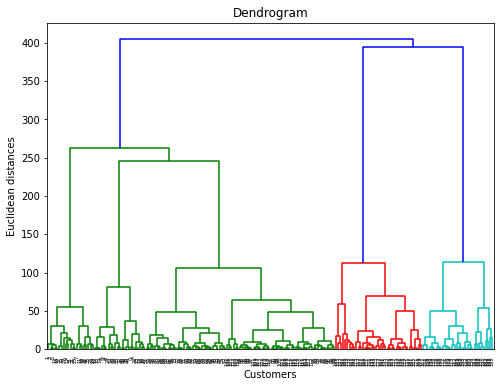

In [ ]:
# Dendogram plot is within scipy library
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8, 6))
# create a dendogram

dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # in HC --> recommended method that brings clusters - minimum variance
# method='ward' ---> minimizes variance in each cluster

# Plot the dendrogram - Visualization
plt.title('Dendrogram')
plt.xlabel('Customers') # each row - observation points
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [ ]:
# from the dendogram, optimal no. of clusters = 5
K = 5

from sklearn.cluster import AgglomerativeClustering

# Create the model
hc = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage='ward')
# affinity --> type of distance to be computed to measure variance between the clusters
# ward --> minimum variance method 

# fit_predict() --> trains model, and also returns y(dependent variable)
y_hc = hc.fit_predict(X) # just like y_pred

The ward method - minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this
sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

'affinity' refers to the distance used in the K-Means algorithm, which is the Euclidean distance. It refers to how the HC algorithm defines (finds) the closest centroids to
each point. 

In [ ]:
print(y_hc)
# all the clusters that each customer belongs to

# first customer --> belongs to cluster 4, second customer --> cluster 3, third customer --> cluster 4, .......

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualising the clusters

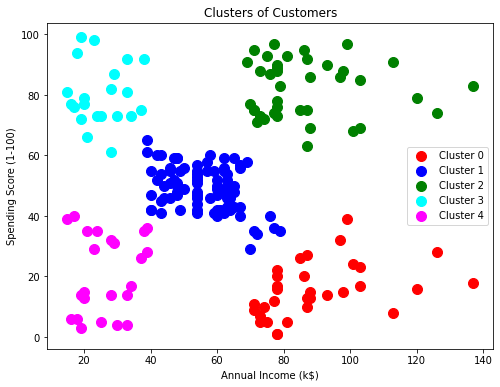

In [ ]:
# Scatter plot each cluster separately
plt.figure(figsize=(8, 6))

# Plot the Clusters

# X --> Annual income, X[0]. y --> Spending Score, X[1]
# X[y_hc == 0, 0] --> select all customers from Annual Income that belong to Cluster 0
# X[y_hc == 0, 1] --> select all customers from Spending Score that belong to Cluster 0

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c = 'red', label='Cluster 0') 

plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c = 'blue', label='Cluster 1') 
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c = 'green', label='Cluster 2') 
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c = 'cyan', label='Cluster 3') 
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c = 'magenta', label='Cluster 4') 


plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

## Conclusion

Cluster 0 --> customers have high annual income, and low spending score

Cluster 4 --> Customers have low annual income, and has low spending score

Some Marketing/Business Strategies
Target customers in cluster 2 because they have high income, and they spend a lot. Thus, more profit can be generated for the business. So we can target them with new deals and offers

For new deals and offers, do not target(or pressurize) customers in cluster 3. These customers show loyalty to the business and must be retained.

We can target some customers in cluster 0 in order to attract them to the business.